# APS1070, Tutorial 4 

## Linear Regression

### Introduction

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let $x$ be the independent variable and $y$ be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = wX + b$

This is the equation for a line that you studied in high school. $w$ is the slope of the line and b is the $y$ intercept. Today we will use this equation to train our model with a given dataset and predict the value of $y$ for any given value of $x$. Our challenge today is to determine the value of $w$ and $b$, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where $y$ and $w$ are vectors while $X$ is a matrix. 

Where is the b term? It is included within the $X$ matrix.


**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:



$y= b + w_1x_1 + w_2x_2 + ......+w_nx_n$



The bias term can further be incorporated into the quation as an additional weight with cofficient 1

$y= w_0(1) + w_1x_1 + w_2x_2 + ......+w_nx_n$, where $w_0 = b$

- $y$ is the predicted value ($h_w(x)$)
- $w_0$ is the bias term.
- $w_i$, where i>0 are the model parameters
- $x_i$, where i>0 are the feature values.

### Loss and Cost functions

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:


$L(y,t)=\frac{1}{2}\ (y-t)^2$

Here $t$ is the actual value and $y$ is the predicted value. 
For the simplest case lets assume a straight line with folowing equation Lets substitute the value of $y$ from $y = wx + b$ and compute the average for $N$ examples ):

 Cost Function: $J=\frac{1}{2N}[\sum_{i=1}^N((wx^{(i)}+b)-t^{(i)})^2]$

Partial Derivative of the above equation with respect to $w$ is shown here:


$\frac{{\partial J}}{\partial w}=\frac{1}{2N}[\sum_{i=0}^N2~x^{(i)}~((wx^{(i)}+b)-t^{(i)})]$

$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

While the Partial Derivative with respect to $b$ is shown here:

$\frac{\partial J}{\partial b}=\frac{1}{N}[\sum_{i=0}^N(y^{(i)}-t^{(i)})]$

#### Direct Solution

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. $\frac{{\partial J}}{\partial w}=0$ and  $\frac{{\partial J}}{\partial b}=0$.

This is because at the point where cost function is at the minimum with respect to the parameters ($w$ and $b$), the derivative of cost function with respect to the parameters would be zero.

The solution for the general case comes out to be:

$w = (X^TX)^{-1}X^Tt$

With $L_2$ Regularization. Cost:

$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda\sum_{j=1}^nw^2_j]$ 

$w = (X^TX + \lambda I)^{-1}X^Tt$

### Practice Direct solution


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

We will start with fitting distribution of data points with a line followed by higher order polynomials to visualize the idea behind it.

In [2]:
n = 50 # number of points
w = 2 # slope of line
b = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x =  r*np.random.rand(n)
x.sort()
yPerf = w*x + b # perfect world: no noise
y = w*x + b + 0.2 * np.random.randn(n) # imperfect world: we get noisy data

Spoiler Alert: We are in an Imperfect World.

In [3]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

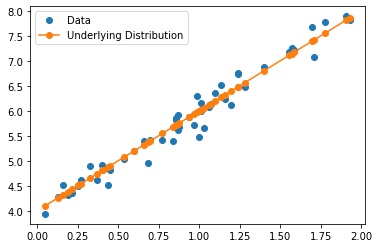

In [4]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [5]:
x.shape

(50,)

In [6]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [7]:
x

array([[1.        , 0.05185246],
       [1.        , 0.13057301],
       [1.        , 0.15929095],
       [1.        , 0.19306183],
       [1.        , 0.21389137],
       [1.        , 0.25431994],
       [1.        , 0.26915989],
       [1.        , 0.3245972 ],
       [1.        , 0.36887973],
       [1.        , 0.40348645],
       [1.        , 0.40929727],
       [1.        , 0.44061241],
       [1.        , 0.452024  ],
       [1.        , 0.53365455],
       [1.        , 0.59930935],
       [1.        , 0.66066964],
       [1.        , 0.68322731],
       [1.        , 0.69965257],
       [1.        , 0.7737853 ],
       [1.        , 0.8407356 ],
       [1.        , 0.85509193],
       [1.        , 0.85624466],
       [1.        , 0.87064479],
       [1.        , 0.8719898 ],
       [1.        , 0.87349453],
       [1.        , 0.93557497],
       [1.        , 0.96613967],
       [1.        , 0.98847367],
       [1.        , 1.00001672],
       [1.        , 1.01047344],
       [1.

In [8]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, W)

In [9]:
W[0],W[1]

(array([3.9431107]), array([2.04969214]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

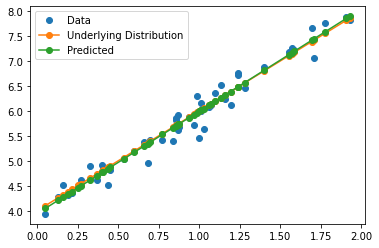

In [10]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [11]:
print('RMSE Perf: ', rmse(yPerf, y))
print('RMSE Pred: ', rmse(yPred, y))

RMSE Perf:  0.19456779608856656
RMSE Pred:  0.19267293653588508


### Feature Mapping


In [12]:
n = 200 # number of points
r = 100  # range of data on x-axis

np.random.seed(10)
X  = r * np.random.random(n) -50
X.sort()
np.random.seed(10)
y =  np.random.normal(-1, 1, n)  # imperfect world: we get noisy data
l1 =np.array(X<-10)
y[l1]+= 5 + 0.5*np.random.random()
l2 = np.array(X>10)
y[l2]+= -5 - 0.5*np.random.random()

In [13]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [15]:
one_train = np.ones(np.shape(X_train))
one_valid = np.ones(np.shape(X_valid))
X_train_1f = np.hstack((one_train, X_train))
X_valid_1f = np.hstack((one_valid, X_valid))

X_train_1f[0:10]

array([[  1.        ,  34.43857945],
       [  1.        ,   7.81364299],
       [  1.        , -35.14665486],
       [  1.        ,   1.23341533],
       [  1.        , -14.93436087],
       [  1.        ,  30.00687507],
       [  1.        ,   4.75861559],
       [  1.        , -13.46350288],
       [  1.        ,  40.28317603],
       [  1.        ,  30.52231968]])

In [16]:
def Direct_sol (X_train,y_train , X_valid, y_valid):
  W = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) # Train the model using training set: finding weights
  y_pred_train = np.dot(X_train, W) # prediction on the training set
  y_pred_valid = np.dot(X_valid, W) # prediction on the validation set
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  plt.scatter(X_train[:,1], y_train, label='Data')
  plt.scatter(X_train[:,1], y_pred_train, label='Prediction')
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)
  plt.legend()
  plt.show()
  return W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid



RMSE on training set:  2.1052991906325684
RMSE on validation set:  1.747143224448845


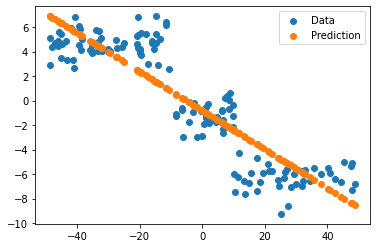

In [17]:
Result = Direct_sol( X_train_1f, y_train , X_valid_1f, y_valid)

 What to do next?

Can we add more features.

RMSE on training set:  2.0940310534116655
RMSE on validation set:  1.7097172237558378


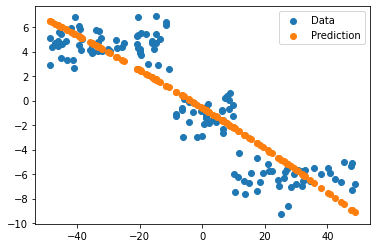

In [18]:
X_train_2f = np.hstack(( one_train , X_train, X_train**2))
X_valid_2f = np.hstack(( one_valid, X_valid, X_valid**2))
Result = Direct_sol( X_train_2f, y_train , X_valid_2f, y_valid)

RMSE on training set:  1.5642177441663359
RMSE on validation set:  1.5420199974499138


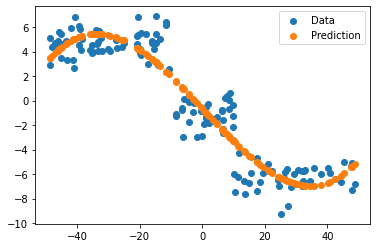

In [19]:
X_train_3f = np.hstack(( one_train , X_train, X_train**2, X_train**3))
X_valid_3f = np.hstack(( one_valid, X_valid, X_valid**2, X_valid**3))
Result = Direct_sol( X_train_3f, y_train , X_valid_3f, y_valid)

But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [20]:
X_train_12f = np.hstack(( one_train , X_train, X_train**2, X_train**3 , X_train**4 , X_train**5 , X_train**6 , X_train**7 , X_train**8 , X_train**9 , X_train**10 , X_train**11))
X_valid_12f = np.hstack(( one_valid, X_valid, X_valid**2, X_valid**3,   X_valid**4,  X_valid**5,  X_valid**6,  X_valid**7,  X_valid**8,  X_valid**9,  X_valid**10,  X_valid**11))

RMSE on training set:  1.3794025593100767
RMSE on validation set:  1.376413895933909


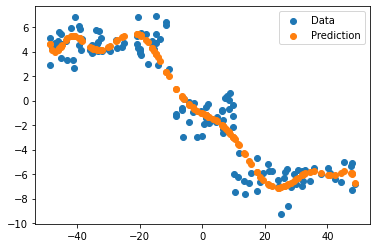

In [21]:
Result = Direct_sol( X_train_12f, y_train , X_valid_12f, y_valid)

Is the model overfitted?

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

#### Regularization: add penalty on weights

In [22]:
def Direct_sol_reg (X_train,y_train , X_valid, y_valid , lm):
  W = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (lm)*np.identity(np.shape(X_train)[1])), np.dot(X_train.T, y_train))
  y_pred_train = np.dot(X_train, W)
  y_pred_valid = np.dot(X_valid, W)
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  plt.scatter(X_train[:,1], y_train, label='Data')
  plt.scatter(X_train[:,1], y_pred_train, label='Prediction')
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)
  plt.legend()
  plt.show()
  return W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid

RMSE on training set:  1.3814800431594303
RMSE on validation set:  1.373688949285445


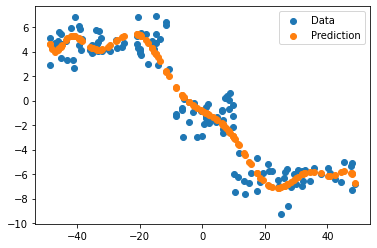

In [23]:
Result = Direct_sol_reg( X_train_12f, y_train , X_valid_12f, y_valid ,5)


A systematic way for feature mapping:

RMSE on training set:  1.1733086754242241
RMSE on validation set:  1.1474075477418395


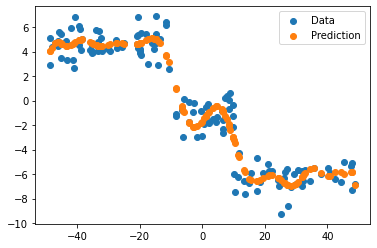

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(20).fit(X_train)
X_train_pf = poly.transform(X_train)
X_val_pf = poly.transform(X_valid)
Result = Direct_sol_reg( X_train_pf, y_train , X_val_pf, y_valid , 0)


RMSE on training set:  1.2065644578090413
RMSE on validation set:  1.1323007616713299


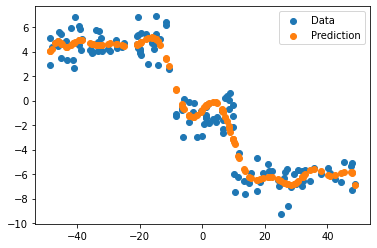

In [25]:
Result = Direct_sol_reg( X_train_pf, y_train , X_val_pf, y_valid ,15)


#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters $w$ and $b$. 


$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

$w_{j+1}=w_j-\alpha \times \frac{{\partial J}}{\partial w}$



Here the term $\alpha$ is defined as the learning rate.

![link text](https://www.eecg.utoronto.ca/~hadizade/APS1070/1.PNG)
![link text](https://www.eecg.utoronto.ca/~hadizade/APS1070/2.PNG)

In [26]:
import math
n = 500 # number of points
w = 7 # slope of line
b = -10 # y intercept of line
r = 2 # range of data on x-axis
w_i=[-10,7,10,20]
np.random.seed(2)
x =  r*np.random.rand(n)
t = (w_i[1]*x  +  w_i[2]* np.sin(math.pi*x*2) + w_i[3]*np.cos(math.pi*x*3) + w_i[0] + 0.2 * np.random.randn(n)).reshape(-1,1) 

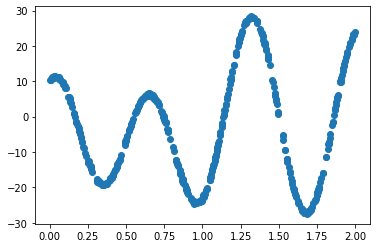

In [27]:
plt.scatter(x,t)

In [28]:
X=x.reshape(-1,1)
X= np.hstack((np.ones(np.shape(X)), X ,np.sin(math.pi*X*2), np.cos(math.pi*X*3) ))
X[0:10]

array([[ 1.        ,  0.8719898 , -0.72035346, -0.3563221 ],
       [ 1.        ,  0.05185246,  0.32006551,  0.88294489],
       [ 1.        ,  1.09932496,  0.58434859, -0.5929204 ],
       [ 1.        ,  0.87064479, -0.72618934, -0.34444932],
       [ 1.        ,  0.8407356 , -0.84184236, -0.06970818],
       [ 1.        ,  0.66066964, -0.84657493,  0.99840313],
       [ 1.        ,  0.40929727,  0.5395496 , -0.75447452],
       [ 1.        ,  1.23854193,  0.99740961,  0.62677578],
       [ 1.        ,  0.59930935, -0.584269  ,  0.80517384],
       [ 1.        ,  0.53365455, -0.20988543,  0.3118948 ]])

X:  (500, 4)
w:  (1, 4)
y:  (500, 1)
t:  (500, 1)
gradient:  (1, 4)


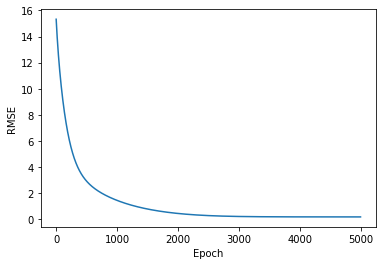

In [29]:
w = (np.random.random(4)).reshape(1,-1) ### Inital weights
lr = .01  ### Learning rate
rmse_array=[]

for epoch in range (0, 5000): 
  y= np.dot(X,w.T).reshape (-1,1)
  rmse_array.append(rmse(y,t))
  gradient = (1/len(y) * np.dot(X.T, y-t)).reshape(1,-1)
  w = w - lr * gradient ### weight update


print ("X: ", X.shape)
print ("w: ", w.shape)
print ("y: ", y.shape)
print ("t: ", t.shape)
print ("gradient: ", gradient.shape)
plt.plot(rmse_array)
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

In [30]:
w

array([[-10.00834064,   6.99156109,  10.0094239 ,  19.99745073]])

#Mini-batch Gradient Descent!
![link text](https://www.eecg.utoronto.ca/~hadizade/APS1070/3.PNG)